![networkx image](screenshots/networkx.png "networkx image")


Analyzing and Manipulating Networks in Python
 
#### PyData Hamburg 24/10/2018 - Christoph Martin



<img style="float: right;" src="screenshots/graphExample.png" width="400">

__Network__: a pattern of interconnections among a set of things

__Node / Vertex__: The entity of analysis which has a relationship. Node is used in the network context, vertex is used in the graph theory context, but both terms are often used interchangeably.

__Link / Edge / Relationship__: The connections between the nodes. Link is used in the network context, edge is used in the graph theory context, and all words are used interchangably with *relationship*.

__Attributes__: Both nodes and edges can store attributes, which contain additional data about that object.

__Weight__: A common *attribute* of edges, used to indicate *strength* or *value* of a relationship.

__Degree__: Number of edges a node has.

A network is [unweighted/weighted] and [undirected/directed] and may contains parallel edges and / or self loops.

http://networksciencebook.com/

| Network               | Nodes                      | Edges                | Directionality |
|-----------------------|----------------------------|----------------------|----------------|
| Internet              | Routers                    | Internet connections | Undirected     |
| WWW                   | Webpages                   | Links                | Directed       |
| Power Grid            | Power plants, transformers | Cables               | Undirected     |
| Mobile-Phone Calls    | Subscribers                | Calls                | Directed       |
| Email                 | Email addresses            | Emails               | Directed       |
| Science Collaboration | Scientists                 | Co-authorships       | Undirected     |
| Actor Network         | Actors                     | Co-acting            | Undirected     |
| Citation Network      | Papers                     | Citations            | Directed       |
| E. Coli Metabolism    | Metabolites                | Chemical reactions   | Directed       |
| Protein Interactions  | Proteins                   | Binding interactions | Undirected     |

If your data is not 'tabular' but contains relationships / similarities between the observations, them you might want to build a network based on that data..

# Working with networks in Python

Today: NetworkX

    NetworkX is a Python package for the creation, manipulation,
    and study of the structure, dynamics, and functions of
    complex networks. (https://networkx.github.io/)

* Data structures for graphs, digraphs, and multigraphs
* Many standard graph algorithms, network structure and analysis measures
* Nice API
* Open-Source

### Basics

Documentation (good): https://networkx.github.io/documentation/stable/

```
# installation
$ pip install networkx
```

Current stable version (2.2) of NetworkX supports Python 2.7, 3.5, 3.6, or 3.7.

Some features may require other packages (e.g.: matplotlib for plotting, numpy/scipy for faster computations)

In [1]:
import numpy as np
import pandas as pd

import networkx as nx
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore") # hide MatplotlibDeprecationWarning

In [3]:
def draw_network(graph, seed=42):
    nx.draw(graph, pos=nx.spring_layout(graph, seed=seed),
            with_labels=True, node_size=1000)

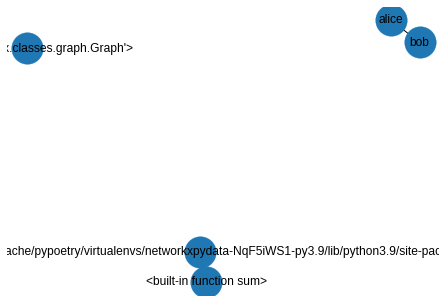

In [4]:
g = nx.Graph()
g.add_node('alice'),g.add_node('bob')
g.add_edge('alice', 'bob')
g.add_node(sum), g.add_node(nx.Graph) #hashable objects can be nodes
g.add_edge(sum, nx)
draw_network(g)

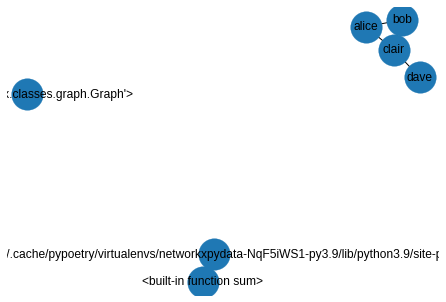

In [5]:
g.add_nodes_from(['clair', 'dave'])
g.add_edges_from([['bob', 'clair'], ['alice', 'clair'],  ['clair', 'dave']])

draw_network(g)

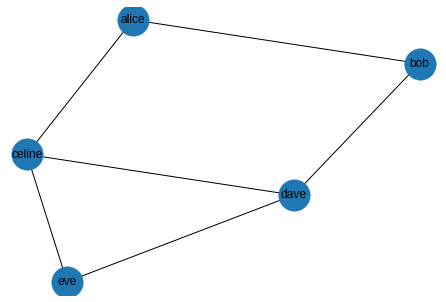

In [6]:
edges = [['alice', 'bob'], ['alice', 'celine'], ['celine', 'dave'],
         ['bob', 'dave'], ['dave', 'eve'], ['celine', 'eve']]
g = nx.from_edgelist(edges)
draw_network(g)

Graph classes in networkx: 
`nx.Graph`, `nx.DiGraph`, `nx.MultiGraph`, and `nx.MultiDiGraph`

Name: 
Type: DiGraph
Number of nodes: 5
Number of edges: 6
Average in degree:   1.2000
Average out degree:   1.2000


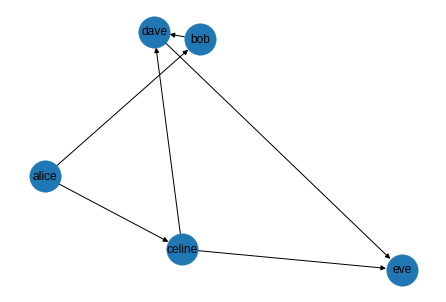

In [7]:
g = nx.from_edgelist(edges, create_using=nx.DiGraph)
draw_network(g)
print(nx.info(g))

In [8]:
g.is_directed()

True

NetworkX can read may popular graph formats, e.g.: gml, graphml, edgelist, adjlist, ..

In [9]:
!zcat house.edgelist.gz | head -n3

alice bob
alice celine
bob dave


In [10]:
g = nx.read_edgelist('house.edgelist.gz')
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 5
Number of edges: 6
Average degree:   2.4000


We can also use pandas DataFrames to create networks..

In [11]:
dfrm = pd.read_csv('house.csv')
dfrm.tail(2)

,source,target,intensity
4,celine,eve,3
5,dave,eve,1


In [12]:
g = nx.from_pandas_edgelist(dfrm, source='source', target='target',
                            edge_attr='intensity')
g.graph['name'] = 'house'

In [13]:
print(nx.info(g))

Name: house
Type: Graph
Number of nodes: 5
Number of edges: 6
Average degree:   2.4000


In [14]:
g.edges(data=True)

EdgeDataView([('alice', 'bob', {'intensity': 1}), ('alice', 'celine', {'intensity': 1}), ('bob', 'dave', {'intensity': 2}), ('celine', 'dave', {'intensity': 2}), ('celine', 'eve', {'intensity': 3}), ('dave', 'eve', {'intensity': 1})])

In [15]:
g.edges[('celine', 'dave')]

{'intensity': 2}

In [16]:
g.nodes(data=True)

NodeDataView({'alice': {}, 'bob': {}, 'celine': {}, 'dave': {}, 'eve': {}})

https://en.wikipedia.org/wiki/Zachary%27s_karate_club

![karate image](screenshots/karate.jpeg "karate image")

### Some network analysis - Zachary's karate club 
Zachary's karate club is a well-known social network. The data was collected from the members of a university karate club by Wayne Zachary in 1977. Each node represents a member of the club, and each edge represents a tie between two members of the club. The network is undirected. An often discussed problem using this dataset is to find the two groups of people into which the karate club split after an argument between two teachers.

In [17]:
karate = nx.karate_club_graph()

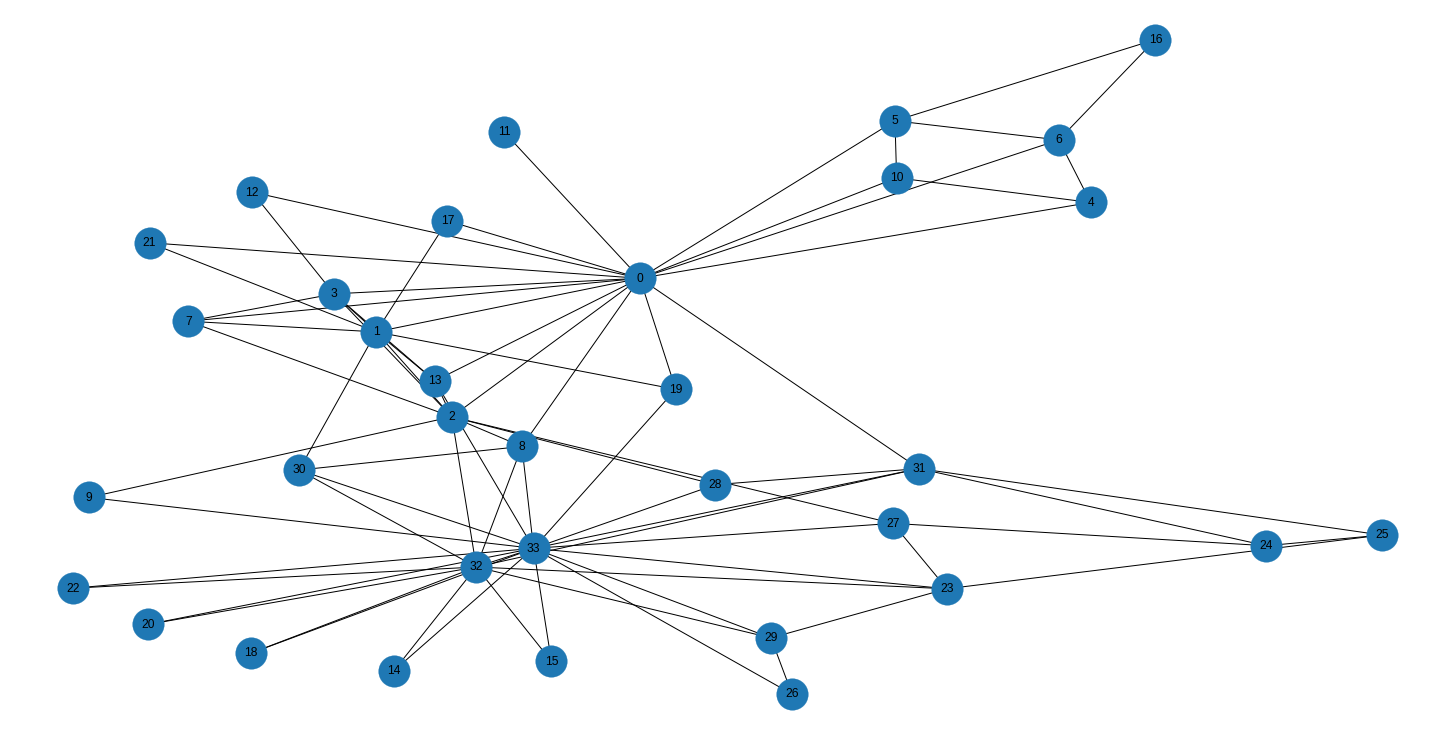

In [18]:
plt.figure(figsize=(20,10))
draw_network(karate)

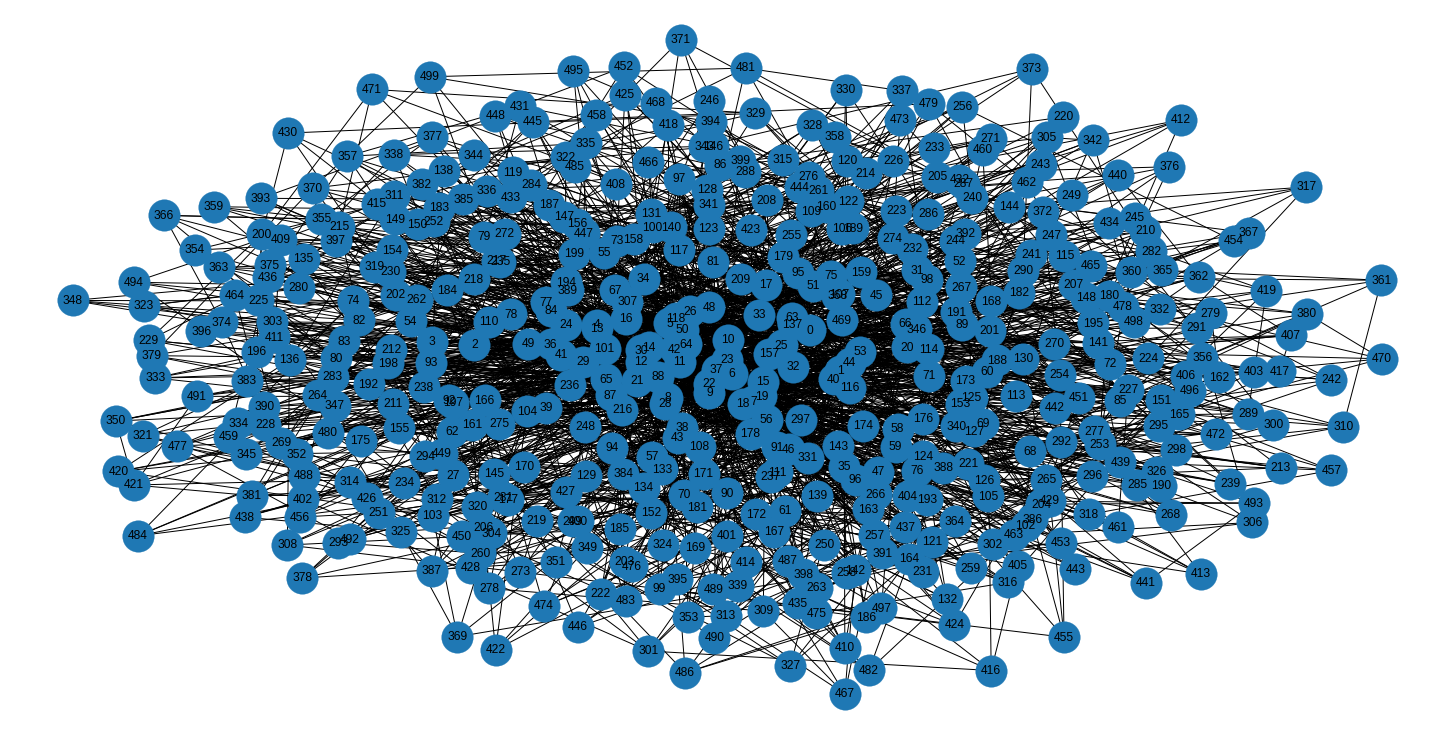

In [19]:
plt.figure(figsize=(20,10))
draw_network(nx.barabasi_albert_graph(500,5))

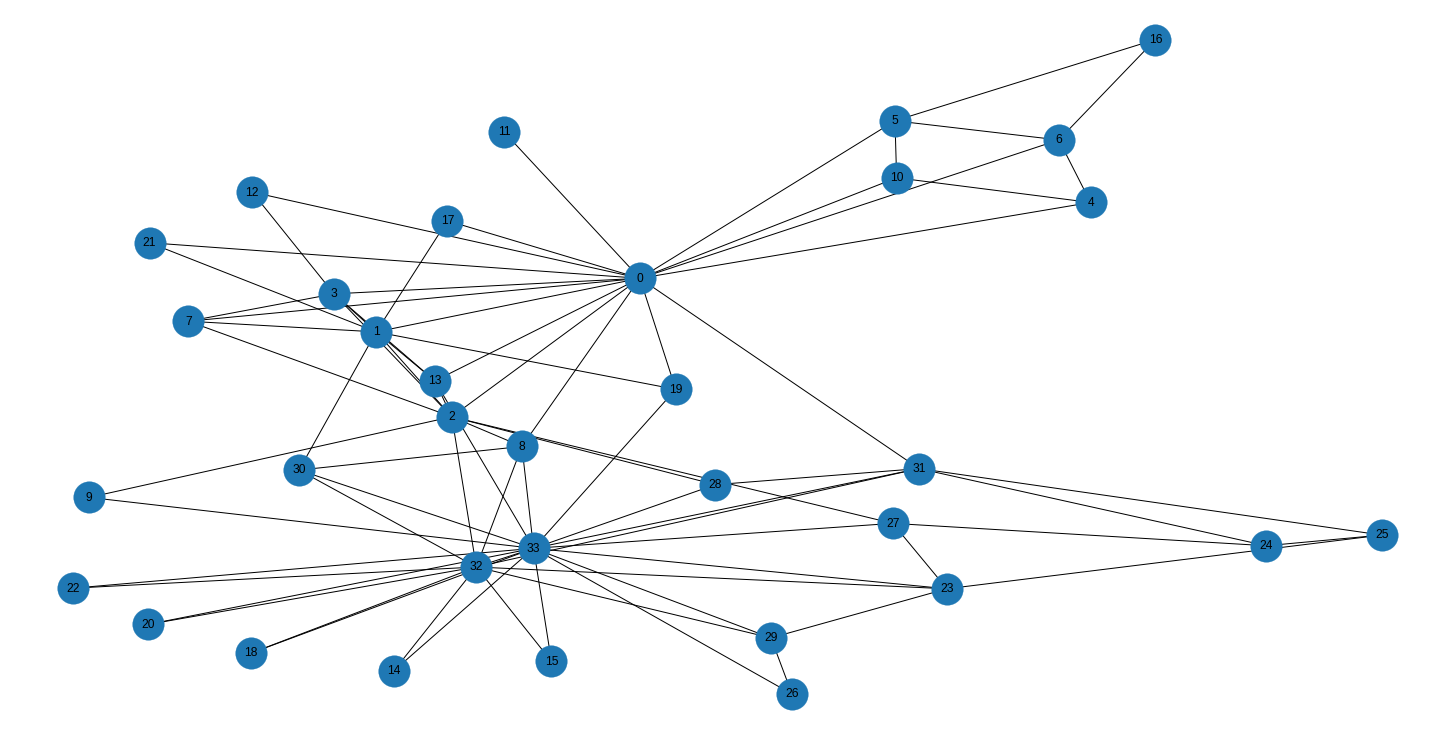

In [20]:
plt.figure(figsize=(20,10))
draw_network(karate)

In [21]:
print(nx.info(karate))

Name: Zachary's Karate Club
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


In [22]:
karate.number_of_nodes(), karate.number_of_edges()

(34, 78)

The density of a graph is defined as a ratio of the number of edges to the number of possible edges in a graph.

In [23]:
nx.density(karate), 78 / (34*33/2)

(0.13903743315508021, 0.13903743315508021)

The diameter of a graph is the length of the longest shortest path in a graph.

In [24]:
nx.diameter(karate)

5

The degree of a node in a network is the number of connections it has to other nodes.

In [25]:
nx.degree(karate, nbunch=[32, 33, 1])

DegreeView({32: 12, 33: 17, 1: 9})

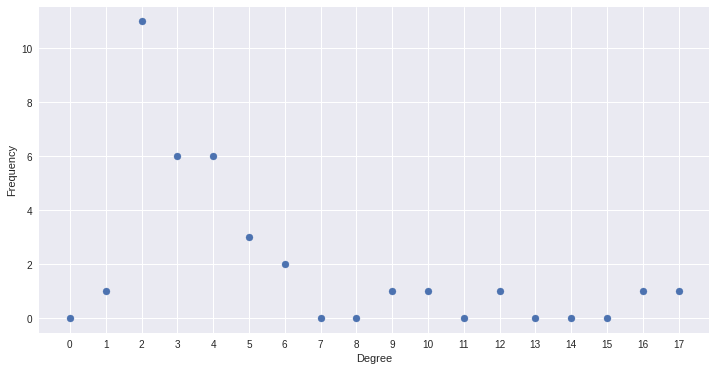

In [26]:
deg_hist = nx.degree_histogram(karate)
plt.figure(figsize=(12,6))
plt.scatter(np.arange(len(deg_hist)), deg_hist)
plt.xlabel('Degree'), plt.ylabel('Frequency')
_=plt.xticks(np.arange(len(deg_hist)))

In [27]:
nx.degree_assortativity_coefficient(karate)

-0.47561309768461457

Centrality measures map a real number to all nodes in a graph. They don't use attributes, they only rely on the graph structure. The centrality values are usually used to measure the 'importance' of individual nodes in a graph.

Examples
```
nx.degree_centrality,
nx.closeness_centrality,
nx.betweenness_centrality,
nx.pagerank
```

.. and many other available in the `nx.algorithms.centrality` module.

Usage: First argument is the graph.  Return value is a dict: key are the nodes, values are the centrality values for the corresponding node.

# Visualizing Networks

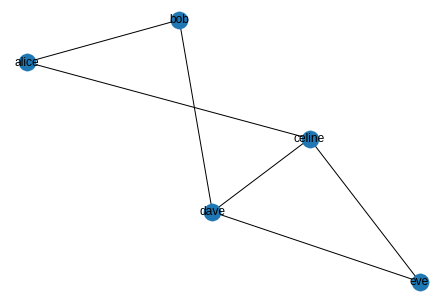

In [28]:
nx.draw(g, with_labels=True)

Networkx offers a variety of layout algorithms, e.g.:
```
nx.layout.circular_layout
nx.layout.random_layout
nx.layout.fruchterman_reingold_layout # often useful
```

In [29]:
pos = nx.fruchterman_reingold_layout(g, seed=42)

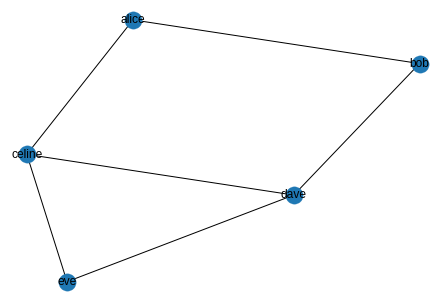

In [30]:
nx.draw(g, with_labels=True, pos=pos) # fix node position

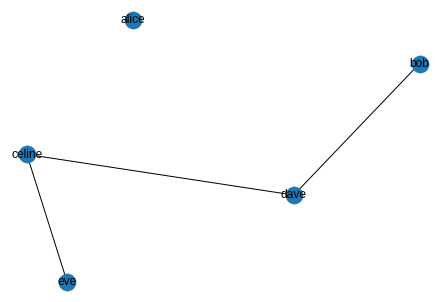

In [31]:
edgelist_high = [x for x in g.edges(data=True) if x[-1]['intensity'] > 1]
nx.draw(g, edgelist=edgelist_high, pos=pos, with_labels=True)

In [32]:
el = nx.get_edge_attributes(g, 'intensity')

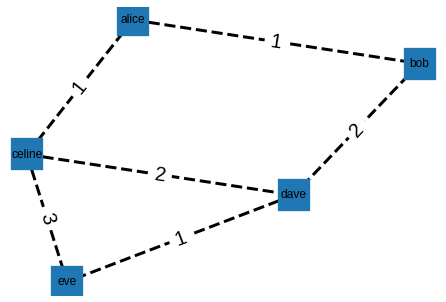

In [33]:
h_pos = nx.fruchterman_reingold_layout(g, seed=42)
nx.draw(g, pos=h_pos, with_labels=True, width=3, style='dashed', node_size=1000, node_shape='s')
_ = nx.draw_networkx_edge_labels(g, edge_labels=el, pos=h_pos, font_size=20)

In [34]:
club_colors = ['red' if v['club'] =="Mr. Hi" else 'lightblue' for k,v in karate.nodes(data=True)]

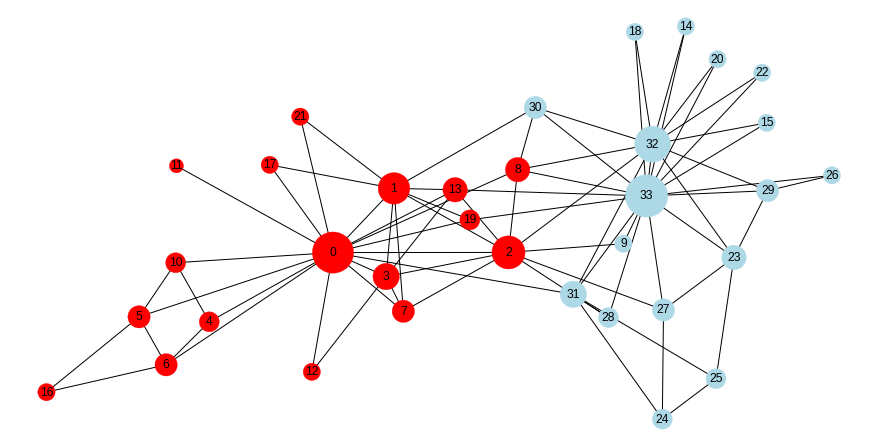

In [35]:
pos_kt = nx.layout.fruchterman_reingold_layout(karate, seed=1984)
pos_kt[33]-= np.array([0, 0.05])
plt.figure(figsize=(12,6))
dg = karate.degree()
dg = np.array([dg[n] for n in karate.nodes])
nx.draw(karate, node_color=club_colors, pos=pos_kt, with_labels=True, node_size=dg*100+100)

__Alternatives (usually faster)__

* graph-tool https://graph-tool.skewed.de/
* igraph http://igraph.org/python/
* NetworKit https://networkit.iti.kit.edu/

__More intormation__
* Network Science by Albert-László Barabási (http://networksciencebook.com)
* Networks: An Introduction by Mark Newman
* NetworkX Documentation (https://networkx.github.io/documentation/stable)
* NetworkX Tutorial by RTI (https://github.com/rtidatascience/connected-nx-tutorial)

__Slides__
* https://github.com/crsqq/NetworkXpydata

__Contact__ 
* @crsqq